In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


'3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]'

In [45]:
print(os.listdir("C:\\Users\\admin\\Desktop\\GAN\\hmeq-data"))
df=pd.read_csv("C:\\Users\\admin\\Desktop\\GAN\\hmeq-data\\hmeq.csv")
print(df.columns.values)
columnNames = pd.Series(df.columns.values)

df.head(5)

['hmeq.csv']
['BAD' 'LOAN' 'MORTDUE' 'VALUE' 'REASON' 'JOB' 'YOJ' 'DEROG' 'DELINQ'
 'CLAGE' 'NINQ' 'CLNO' 'DEBTINC']


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [46]:
df.shape
description=df.describe()
description

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [47]:
data_types=df.dtypes
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [48]:
Missingdata=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
Missingdata


,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


In [49]:
df.dropna(axis=0,how='any',inplace=True)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
34,0,2900,103949.0,112505.0,HomeImp,Office,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136
35,0,2900,104373.0,120702.0,HomeImp,Office,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859
36,1,2900,7750.0,67996.0,HomeImp,Other,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348
37,1,2900,61962.0,70915.0,DebtCon,Mgr,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
38,0,3000,104570.0,121729.0,HomeImp,Office,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783


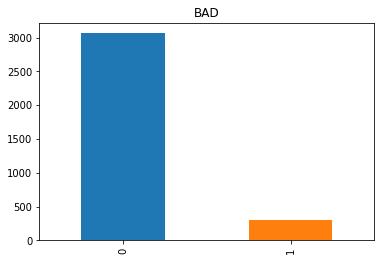

In [50]:
df['BAD'].value_counts().plot.bar(title='BAD')

,REASON,TOTAL count
0,DebtCon,2369
1,HomeImp,995


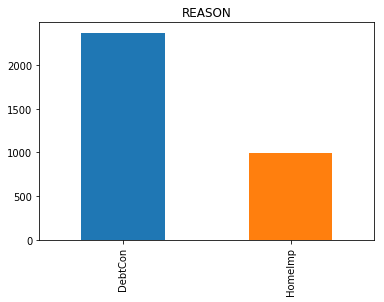

In [51]:

REASON_count=df['REASON'].value_counts().rename_axis('REASON').reset_index(name='TOTAL count')
df['REASON'].value_counts().plot.bar(title='REASON')
REASON_count

,JOB,TOTAl count
0,Other,1286
1,ProfExe,899
2,Office,577
3,Mgr,450
4,Self,99
5,Sales,53


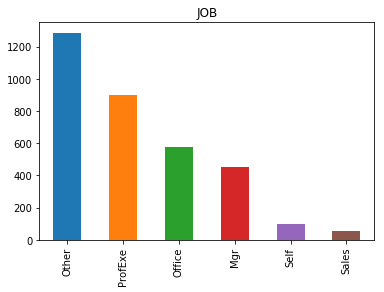

In [52]:
JOB_count=df['JOB'].value_counts().rename_axis('JOB').reset_index(name='TOTAl count')
df['JOB'].value_counts().plot.bar(title='JOB')
JOB_count

In [53]:
f=pd.crosstab(df['JOB'],df['BAD'])
f


BAD,0,1
JOB,,
Mgr,405,45
Office,539,38
Other,1154,132
ProfExe,841,58
Sales,39,14
Self,86,13


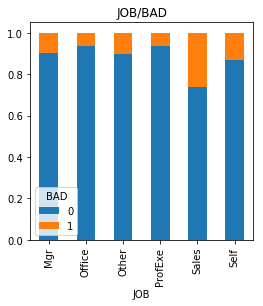

In [54]:
f.sum(1)
f.div(f.sum(1),axis=0,).astype(float).plot(kind='bar',stacked=True,title='JOB/BAD',figsize=(4,4))

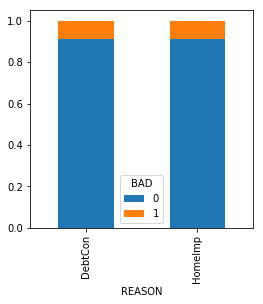

In [55]:
REASON=pd.crosstab(df['REASON'],df['BAD'])
a=REASON.sum(1)
REASON.div(a,axis=0).astype(float).plot(kind='bar',stacked=True,figsize=(4,4))

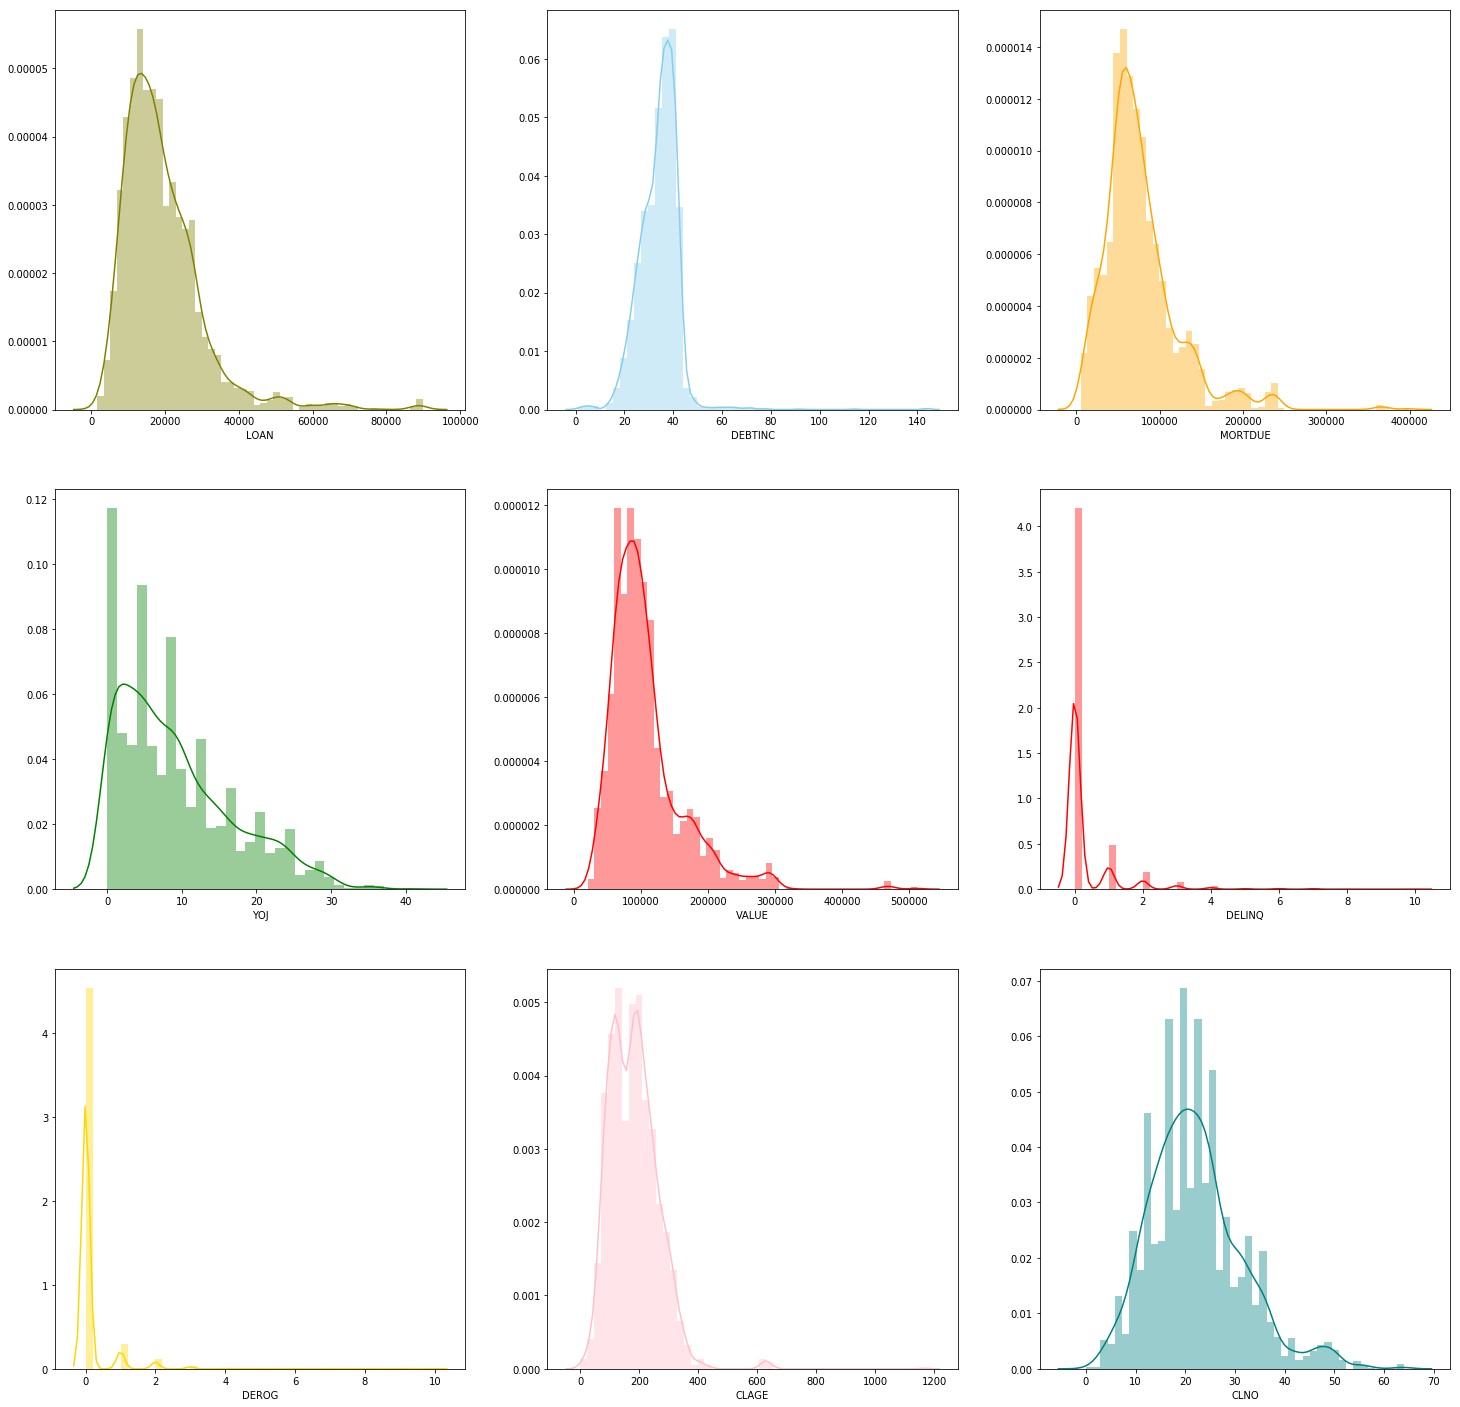

In [56]:
f,axes=plt.subplots(3,3,figsize=(25,25))
sns.distplot(df['LOAN'],color='olive',ax=axes[0,0])
sns.distplot(df['DEBTINC'],color='skyblue',ax=axes[0,1])
sns.distplot(df['MORTDUE'],color='orange',ax=axes[0,2])
sns.distplot(df['YOJ'],color='green',ax=axes[1,0])
sns.distplot(df['VALUE'],color='red',ax=axes[1,1])
sns.distplot(df['DELINQ'],color='red',ax=axes[1,2])
sns.distplot(df['DEROG'],color='gold',ax=axes[2,0])
sns.distplot(df['CLAGE'],color='pink',ax=axes[2,1])
sns.distplot(df['CLNO'],color='teal',ax=axes[2,2])

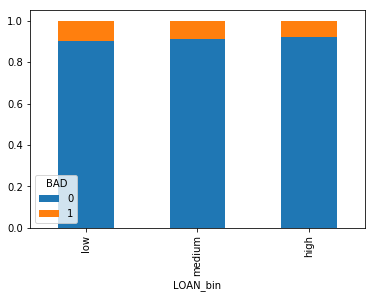

In [57]:
dfWithBin=df.copy()
dfWithBin.columns.values
bins=[0,15000,25000,90000]
group=['low','medium','high']
dfWithBin['LOAN_bin']=pd.cut(df['LOAN'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['LOAN_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1),axis=0).astype(float).plot(kind='bar',stacked=True)


53018.9
85643.7


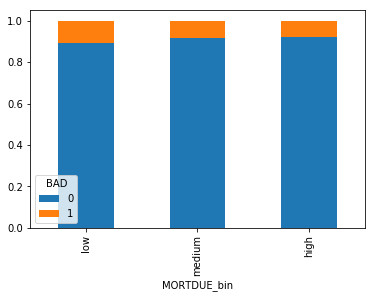

In [58]:
print(dfWithBin['MORTDUE'].quantile(0.3))
print(dfWithBin['MORTDUE'].quantile(0.7))
max(dfWithBin['MORTDUE'])
bins=[0,53000,85643,400000]
dfWithBin['MORTDUE_bin']=pd.cut(dfWithBin["MORTDUE"],bins,labels=group)
MOTUDE_bin=pd.crosstab(dfWithBin['MORTDUE_bin'],dfWithBin['BAD'])
MOTUDE_bin
MOTUDE_bin.div(MOTUDE_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

0.0
1.0


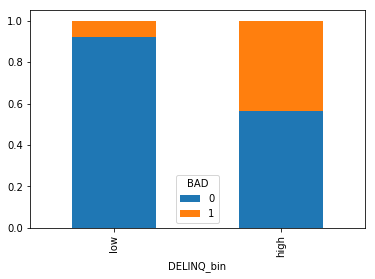

In [59]:
print(dfWithBin['DELINQ'].quantile(0.3))
print(dfWithBin['DELINQ'].quantile(0.9))
group=['low','high']
max(dfWithBin['DELINQ'])
bins=[-1,2,11]
dfWithBin['DELINQ_bin']=pd.cut(dfWithBin['DELINQ'],bins,labels=group)
#dfWithBin
DELINQ_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
DELINQ_bin
#DELINQ_bin
DELINQ_bin.div(DELINQ_bin.astype(float).sum(1),axis=0).plot(kind='bar',stacked=True)

2.0


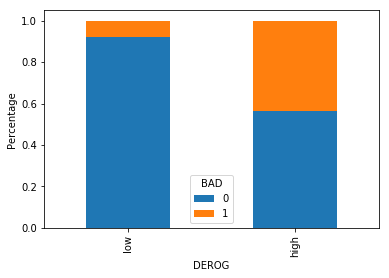

In [60]:
print(dfWithBin['DEROG'].quantile(0.99))
max(dfWithBin['DEROG'])
bins=[-1,1,3]
dfWithBin['DEROG_bin']=pd.cut(dfWithBin['DEROG'],bins,labels=group)
DREOG_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
DELINQ_bin.div(DELINQ_bin.sum(1),axis=0).astype(float).plot(kind='bar',stacked=True)
x=plt.xlabel('DEROG')
p=plt.ylabel('Percentage')


127.119929873
195.555106754
1168.2335609000002


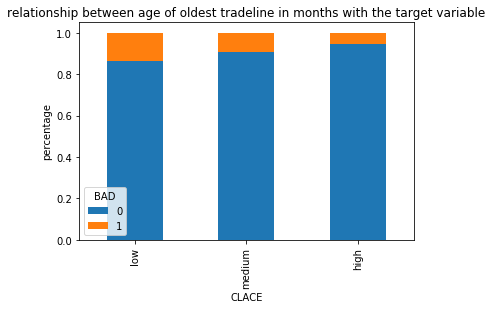

In [61]:
print(dfWithBin['CLAGE'].quantile(0.3))
print(dfWithBin['CLAGE'].quantile(0.6))
print(max(dfWithBin['CLAGE']))
bins=[0,130,195,1169]
group=['low','medium','high']
dfWithBin['CLAGE_bin']=pd.cut(dfWithBin['CLAGE'],bins,labels=group)
CLACE_bin=pd.crosstab(dfWithBin['CLAGE_bin'],dfWithBin['BAD'])
CLACE_bin.div(CLACE_bin.sum(1),axis=0).astype(float).plot(kind='bar',stacked=True,title='relationship between age of oldest tradeline in months with the target variable')
x=plt.xlabel('CLACE')
y=plt.ylabel('percentage')

30.6891171591
36.7020466718
144.18900129


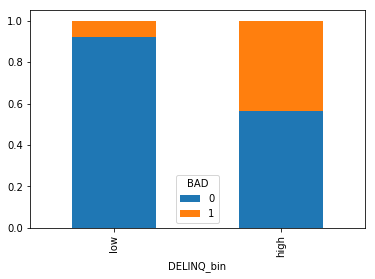

In [62]:
print(dfWithBin['DEBTINC'].quantile(0.3))
print(dfWithBin['DEBTINC'].quantile(0.6))
print(max(dfWithBin['DEBTINC']))
bins=[0,35,150]
group=['low','high']
dfWithBin['DEBTINC_bin']=pd.cut(dfWithBin['DEBTINC'],bins,group)
DEBRINC_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
DEBRINC_bin.div(DEBRINC_bin.sum(1),axis=0).astype(float).plot(kind='bar',stacked=True)

In [63]:
a=df.corr
#fig,ax=plt.subplot(figsize=((10,8))
#sns.set()
#sns.palplot(sns.diverging_palette(240, 10, n=9))

#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)                   
#colormap=sns.diverging_palette(220,10,sep=20，as_cmap=True)
#sns.heatmap(a,camp=acamp)
#

In [64]:
corr = df.corr()
corr


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.031215,-0.016552,-0.026215,-0.064279,0.253711,0.274893,-0.113906,0.125714,0.007529,0.216959
LOAN,-0.031215,1.000000,0.272924,0.378724,0.076359,-0.024263,-0.067468,0.066484,0.051264,0.075893,0.157379
MORTDUE,-0.016552,0.272924,1.000000,0.865265,-0.103307,-0.042590,-0.035903,0.137741,0.036424,0.320759,0.185446
VALUE,-0.026215,0.378724,0.865265,1.000000,-0.021113,-0.045910,-0.068415,0.197697,-0.006878,0.215466,0.130928
YOJ,-0.064279,0.076359,-0.103307,-0.021113,1.000000,-0.055824,0.021976,0.230511,-0.045865,-0.001290,-0.051864
DEROG,0.253711,-0.024263,-0.042590,-0.045910,-0.055824,1.000000,0.147825,-0.053741,0.181596,0.065897,0.035200
DELINQ,0.274893,-0.067468,-0.035903,-0.068415,0.021976,0.147825,1.000000,0.011583,0.003523,0.122612,0.038251
CLAGE,-0.113906,0.066484,0.137741,0.197697,0.230511,-0.053741,0.011583,1.000000,-0.089076,0.201759,-0.050553
NINQ,0.125714,0.051264,0.036424,-0.006878,-0.045865,0.181596,0.003523,-0.089076,1.000000,0.077538,0.157328
CLNO,0.007529,0.075893,0.320759,0.215466,-0.001290,0.065897,0.122612,0.201759,0.077538,1.000000,0.143613


In [65]:
df=pd.get_dummies(df,columns=['REASON','JOB'])
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
34,0,2900,103949.0,112505.0,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136,0,1,0,1,0,0,0,0
35,0,2900,104373.0,120702.0,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859,0,1,0,1,0,0,0,0
36,1,2900,7750.0,67996.0,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348,0,1,0,0,1,0,0,0
37,1,2900,61962.0,70915.0,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396,1,0,1,0,0,0,0,0
38,0,3000,104570.0,121729.0,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783,0,1,0,1,0,0,0,0


In [66]:
Y=df['BAD']
X=df.drop(['BAD'],axis=1)

In [67]:
from sklearn import preprocessing
X_=preprocessing.scale(X)
X_scaled=pd.DataFrame(X_,columns=X.columns)
X_scaled

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.605179,-1.013594,-1.227728,-0.014520,-0.253434,-0.344449,-0.960979,-0.024172,-1.503755,0.374601,-1.543018,1.543018,-0.392972,-0.455008,1.271166,-0.603909,-0.126520,-0.174131
1,-1.595983,-1.058972,-1.178130,0.248797,-0.253434,-0.344449,-1.114440,-0.669522,-1.503755,0.345832,-1.543018,1.543018,-0.392972,-0.455008,1.271166,-0.603909,-0.126520,-0.174131
2,-1.550001,0.579311,0.245826,-0.936129,-0.253434,-0.344449,-1.087536,-0.669522,-0.971043,-0.320362,-1.543018,1.543018,-0.392972,2.197762,-0.786679,-0.603909,-0.126520,-0.174131
3,-1.540804,-0.917894,-1.097044,0.380455,-0.253434,-0.344449,-1.335266,-0.024172,-0.118704,0.519249,-1.543018,1.543018,2.544711,-0.455008,-0.786679,-0.603909,-0.126520,-0.174131
4,-1.540804,0.492349,0.177149,-0.672812,-0.253434,-0.344449,-1.053469,-0.669522,-0.971043,-0.560188,-1.543018,1.543018,-0.392972,2.197762,-0.786679,-0.603909,-0.126520,-0.174131
5,-1.494822,0.614331,0.091440,-1.067787,-0.253434,-0.344449,-1.025791,-0.669522,-0.971043,-0.513735,-1.543018,1.543018,-0.392972,2.197762,-0.786679,-0.603909,-0.126520,-0.174131
6,-1.494822,0.623735,0.241239,-0.936129,-0.253434,-0.344449,-0.960081,-0.669522,-0.971043,-0.530751,-1.543018,1.543018,-0.392972,2.197762,-0.786679,-0.603909,-0.126520,-0.174131
7,-1.494822,-1.519220,-0.721954,0.907089,4.923999,-0.344449,-0.710382,0.621178,-1.503755,0.261111,-1.543018,1.543018,-0.392972,-0.455008,1.271166,-0.603909,-0.126520,-0.174131
8,-1.494822,-0.316878,-0.668610,-0.936129,-0.253434,-0.344449,1.230204,1.266528,1.585974,1.895661,0.648081,-0.648081,2.544711,-0.455008,-0.786679,-0.603909,-0.126520,-0.174131
9,-1.485626,0.628104,0.260007,-0.936129,-0.253434,-0.344449,-1.149260,-0.669522,-0.864501,-0.261083,-1.543018,1.543018,-0.392972,2.197762,-0.786679,-0.603909,-0.126520,-0.174131


In [68]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
model=LogisticRegression()
skf=StratifiedKFold(n_splits=5,shuffle=True)
rfecv=RFECV(estimator=model,step=1,cv=skf,scoring='recall')
fit=rfecv.fit(X_scaled,Y)
support_features = fit.support_
X_sub2 = X_scaled.iloc[:,support_features]
print(fit.n_features_)
print(fit.support_)
ranking_features=fit.ranking_
print(ranking_features)
features=[f for f,s in zip(X_scaled.columns,rfecv.support_) if s]
print(features)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4
[False False False False  True  True  True False False  True False False
 False False False False False False]
[ 6  8  7 10  1  1  1  4  3  1 11 14 12  2 13 15  5  9]
['DEROG', 'DELINQ', 'CLAGE', 'DEBTINC']


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(model,4)
fit = rfe.fit(X_scaled, Y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub1 = X_scaled.iloc[:,support_features] #updated X with the top 4 features
print(X_sub1)
feature=[f for f,s in zip(X_scaled.columns,rfe.support_) if s]
print(feature)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Features: 4
Selected Features: [False False False False  True  True  True False False  True False False
 False False False False False False]
Feature Ranking: [ 6  8  7 10  1  1  1  4  3  1 11 14 12  2 13 15  5  9]
         DEROG    DELINQ     CLAGE    DEBTINC
0    -0.253434 -0.344449 -0.960979   0.374601
1    -0.253434 -0.344449 -1.114440   0.345832
2    -0.253434 -0.344449 -1.087536  -0.320362
3    -0.253434 -0.344449 -1.335266   0.519249
4    -0.253434 -0.344449 -1.053469  -0.560188
5    -0.253434 -0.344449 -1.025791  -0.513735
6    -0.253434 -0.344449 -0.960081  -0.530751
7     4.923999 -0.344449 -0.710382   0.261111
8    -0.253434 -0.344449  1.230204   1.895661
9    -0.253434 -0.344449 -1.149260  -0.261083
10   -0.253434 -0.344449  0.841471   1.103684
11   -0.253434  7.067439  0.136490   0.200637
12   -0.253434 -0.344449 -1.118011  -0.596449
13   -0.253434 -0.344449  0.281291  -1.718760
14   -0.253434 -0.344449 -0.619602  -0.943508
15   -0.253434 -0.344449  0.274996  -1.769560

In [70]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_sub1,Y)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X_sub2,Y)
a1=model.fit(X1_train,Y1_train)
a2=model.fit(X2_train,Y2_train)
print(X1_test)
Y1_pred=a1.predict(X1_test)
Y2_pred=a2.predict(X2_test)
Y1_score=a1.predict_proba(X1_test)
Y2_score=a2.predict_proba(X2_test)


         DEROG    DELINQ     CLAGE   DEBTINC
234  -0.253434 -0.344449 -0.748297 -0.097339
1890 -0.253434 -0.344449  0.011094 -0.116480
2257 -0.253434 -0.344449  1.597373  1.196179
3038 -0.253434 -0.344449 -0.363429  0.390059
1614 -0.253434 -0.344449 -0.036146  0.763611
2965 -0.253434 -0.344449  0.607713  0.170417
3091 -0.253434  0.890866  0.545613  0.765604
107  -0.253434 -0.344449  1.736327 -0.735818
204  -0.253434 -0.344449 -1.455951  0.647159
2869 -0.253434  0.890866 -0.512637  0.408685
2007 -0.253434 -0.344449  1.157240 -1.215029
471   3.198188  0.890866  2.152215 -2.171442
1160 -0.253434 -0.344449 -1.299442 -0.682528
1162 -0.253434 -0.344449 -0.934071  0.318213
1588 -0.253434 -0.344449  0.259758  1.042095
1372 -0.253434 -0.344449 -1.139204 -0.605479
3256 -0.253434 -0.344449  0.376060  0.795603
1165 -0.253434 -0.344449 -0.573386 -1.405076
2365 -0.253434  3.361495  1.336746 -0.808817
583  -0.253434 -0.344449 -0.163988  0.986063
2607  1.472377  0.890866 -0.732775  0.069261
1414 -0.25

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
print(classification_report(Y1_test, Y1_pred))
print(classification_report(Y2_test, Y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       759
           1       0.80      0.20      0.31        82

    accuracy                           0.92       841
   macro avg       0.86      0.59      0.63       841
weighted avg       0.91      0.92      0.89       841

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       787
           1       0.85      0.20      0.33        54

    accuracy                           0.95       841
   macro avg       0.90      0.60      0.65       841
weighted avg       0.94      0.95      0.93       841



In [72]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(Y2_pred,Y2_test)
a=pd.DataFrame(a)


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(Y2_test,Y2_score[:,1])
plt.figure()
plt.plot(fpr,tpr,label='ROC curve'%auc(fpr,tpr))
plt.plot([0,1],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
print(auc(fpr,tpr))
plt.title('ROC for logistic regression')


In [ ]:
C_begin=df[df['BAD']<0.5]
C_vandal=df[df['BAD']>0.5]
a=C_begin.drop('BAD',axis=1)
b=C_vandal.drop('BAD',axis=1)       
np.array(a)
#a.shape

np.array(b)
b.shape
#np.save('C:\\Users\\admin\Desktop\\GAN\\HMEQ\\OCAN-master\\data',C_begin)


In [73]:
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
34,0,2900,103949.0,112505.0,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136,0,1,0,1,0,0,0,0
35,0,2900,104373.0,120702.0,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859,0,1,0,1,0,0,0,0
36,1,2900,7750.0,67996.0,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348,0,1,0,0,1,0,0,0
37,1,2900,61962.0,70915.0,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396,1,0,1,0,0,0,0,0
38,0,3000,104570.0,121729.0,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783,0,1,0,1,0,0,0,0


In [307]:
np.save('C:\\Users\\admin\Desktop\\GAN\\HMEQ\\OCAN-master\\data',b)

In [295]:
import numpy as np

In [297]:
a=np.load('C:\\Users\\admin\\Desktop\\GAN\\HMEQ\\OCAN-master\\data\\raw_credit_card\\C_begin.npy')

In [298]:
a.shape

(3064, 19)